In [2]:
import pandas as pd

In [17]:
train = pd.read_csv('train-001.csv', sep=',')
display(train.head())

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


Общая информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int64  
 3   content_id                      int64  
 4   content_type_id                 int64  
 5   task_container_id               int64  
 6   user_answer                     int64  
 7   answered_correctly              int64  
 8   prior_question_elapsed_time     float64
 9   prior_question_had_explanation  object 
dtypes: float64(1), int64(8), object(1)
memory usage: 7.5+ GB
None

Статистические характеристики данных:
             row_id     timestamp       user_id    content_id  \
count  1.012303e+08  1.012303e+08  1.012303e+08  1.012303e+08   
mean   5.061517e+07  7.703644e+09  1.076732e+09  5.219605e+03   
std    2.922268

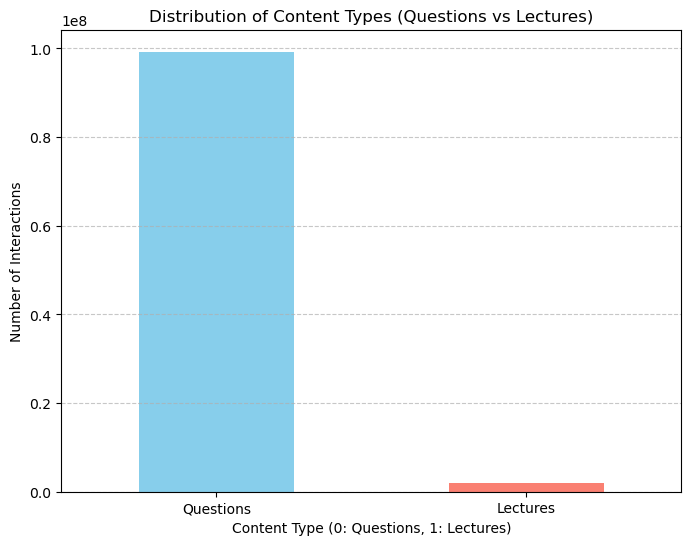

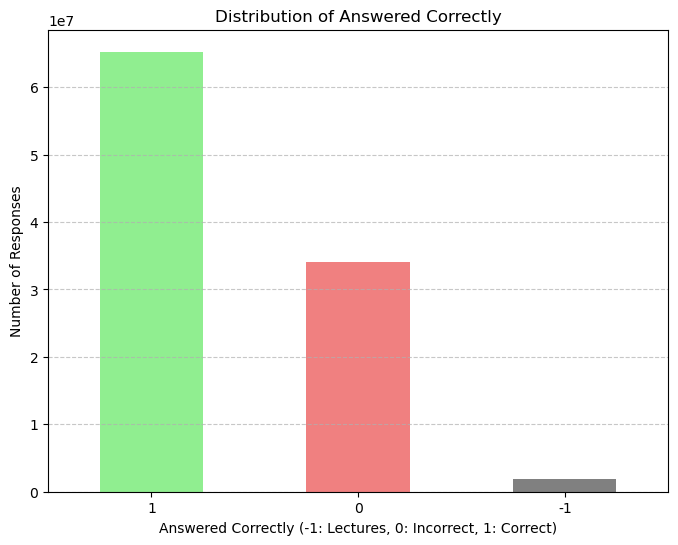

C:\Users\Elena\AppData\Local\Temp\ipykernel_17232\380324219.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_cleaned['prior_question_elapsed_time'] = train_df_cleaned['prior_question_elapsed_time'] / 1000


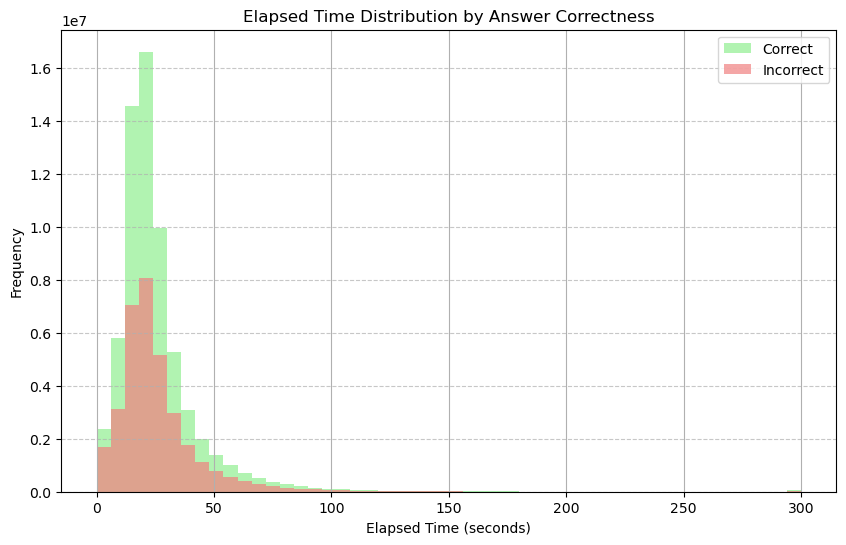

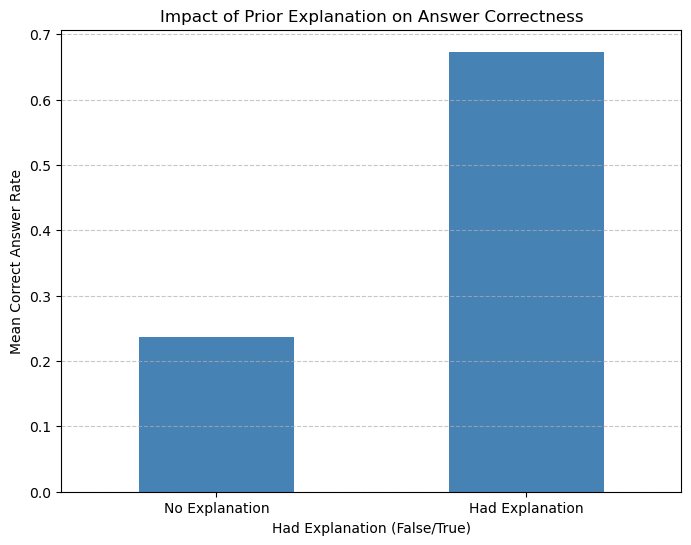

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Общая информация о данных ---
print("Общая информация о данных:")
print(train.info())

print("\nСтатистические характеристики данных:")
print(train.describe())

# --- 2. Проверка пропущенных значений ---
print("\nКоличество пропущенных значений в каждом столбце:")
print(train.isnull().sum())

# --- 3. Распределение контент-типов (вопросы или лекции) ---
content_type_distribution = train['content_type_id'].value_counts()
plt.figure(figsize=(8, 6))
content_type_distribution.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Distribution of Content Types (Questions vs Lectures)")
plt.xlabel("Content Type (0: Questions, 1: Lectures)")
plt.ylabel("Number of Interactions")
plt.xticks([0, 1], ['Questions', 'Lectures'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- 4. Распределение правильных ответов (answered_correctly) ---
answered_correctly_distribution = train['answered_correctly'].value_counts()
plt.figure(figsize=(8, 6))
answered_correctly_distribution.plot(kind='bar', color=['lightgreen', 'lightcoral', 'gray'])
plt.title("Distribution of Answered Correctly")
plt.xlabel("Answered Correctly (-1: Lectures, 0: Incorrect, 1: Correct)")
plt.ylabel("Number of Responses")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- 5. Влияние времени ответа на успешность ---
# Удаляем строки с пропущенными значениями
train_df_cleaned = train.dropna(subset=['prior_question_elapsed_time'])

# Преобразуем время ответа в секунды
train_df_cleaned['prior_question_elapsed_time'] = train_df_cleaned['prior_question_elapsed_time'] / 1000

# Распределение времени на предыдущий вопрос (успешные и неуспешные ответы)
plt.figure(figsize=(10, 6))
train_df_cleaned[train_df_cleaned['answered_correctly'] == 1]['prior_question_elapsed_time'].hist(alpha=0.7, bins=50, label='Correct', color='lightgreen')
train_df_cleaned[train_df_cleaned['answered_correctly'] == 0]['prior_question_elapsed_time'].hist(alpha=0.7, bins=50, label='Incorrect', color='lightcoral')
plt.title("Elapsed Time Distribution by Answer Correctness")
plt.xlabel("Elapsed Time (seconds)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- 6. Влияние объяснений на успешность ---
explanation_success = train.groupby('prior_question_had_explanation')['answered_correctly'].mean()
plt.figure(figsize=(8, 6))
explanation_success.plot(kind='bar', color='steelblue')
plt.title("Impact of Prior Explanation on Answer Correctness")
plt.xlabel("Had Explanation (False/True)")
plt.ylabel("Mean Correct Answer Rate")
plt.xticks([0, 1], ['No Explanation', 'Had Explanation'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [6]:
questions = pd.read_csv('questions.csv', sep=',')
display(questions)

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38
...,...,...,...,...,...
13518,13518,13518,3,5,14
13519,13519,13519,3,5,8
13520,13520,13520,2,5,73
13521,13521,13521,0,5,125


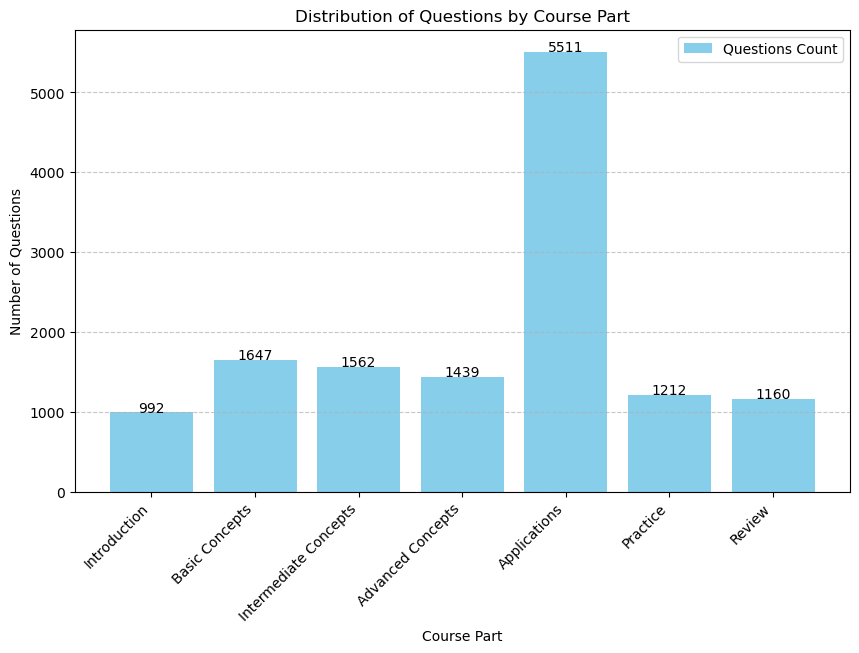

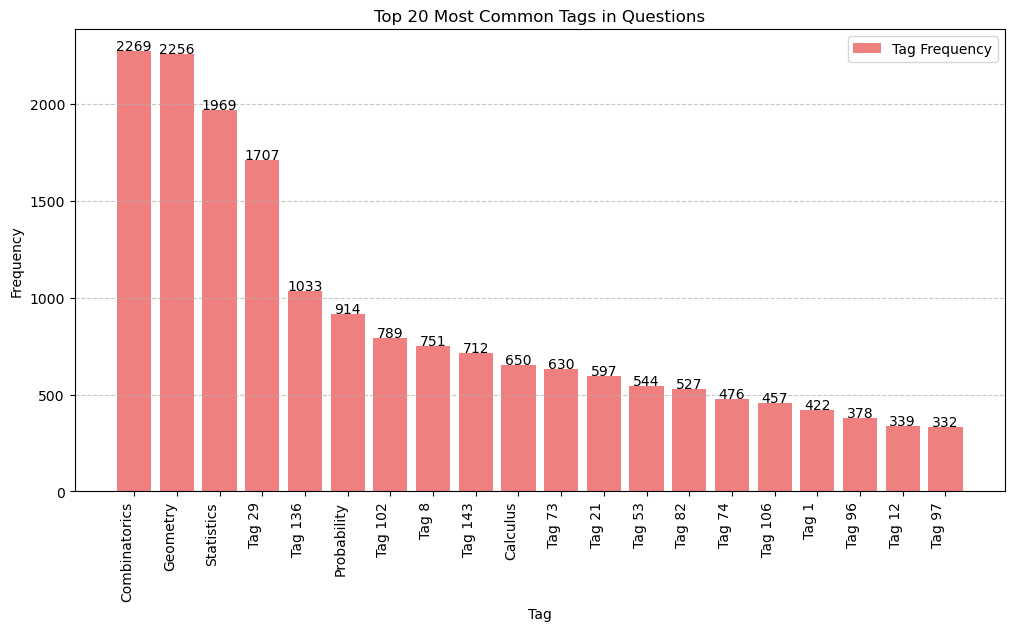

In [14]:
import matplotlib.pyplot as plt
from collections import Counter

# Создание примера с названиями частей курса и тегов
part_names = {
    1: "Introduction",
    2: "Basic Concepts",
    3: "Intermediate Concepts",
    4: "Advanced Concepts",
    5: "Applications",
    6: "Practice",
    7: "Review"
}

tag_names = {
    51: "Algebra",
    131: "Calculus",
    162: "Probability",
    38: "Geometry",
    36: "Linear Algebra",
    81: "Statistics",
    101: "Discrete Math",
    149: "Logic",
    92: "Combinatorics",
    5: "Trigonometry",
    # Добавить остальные теги, если нужно
}

# Распределение вопросов по частям курса
questions_part_distribution = questions['part'].value_counts().sort_index()

# Замена номеров частей на текстовые названия
x_labels_parts = [part_names.get(part, f"Part {part}") for part in questions_part_distribution.index]

# Построение графика
plt.figure(figsize=(10, 6))
plt.bar(x_labels_parts, questions_part_distribution.values, color='skyblue', label='Questions Count')
plt.title("Distribution of Questions by Course Part")
plt.xlabel("Course Part")
plt.ylabel("Number of Questions")
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for index, value in enumerate(questions_part_distribution.values):
    plt.text(index, value + 5, str(value), ha='center')
plt.show()

# Анализ топ-20 часто встречающихся тегов
questions['tags_list'] = questions['tags'].dropna().apply(lambda x: list(map(int, x.split())))
tags_flat = [tag for sublist in questions['tags_list'].dropna() for tag in sublist]
tag_counts = Counter(tags_flat)
common_tags = tag_counts.most_common(20)

# Замена номеров тегов на текстовые названия
tag_labels, tag_values = zip(*common_tags)
x_labels_tags = [tag_names.get(tag, f"Tag {tag}") for tag in tag_labels]

# Построение графика
plt.figure(figsize=(12, 6))
plt.bar(x_labels_tags, tag_values, color='lightcoral', label='Tag Frequency')
plt.title("Top 20 Most Common Tags in Questions")
plt.xlabel("Tag")
plt.ylabel("Frequency")
plt.xticks(rotation=90, ha='right')
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, value in enumerate(tag_values):
    plt.text(i, value + 5, str(value), ha='center')
plt.show()


In [7]:
lectures = pd.read_csv('lectures.csv', sep=',')
display(lectures)

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question
...,...,...,...,...
413,32535,8,5,solving question
414,32570,113,3,solving question
415,32604,24,6,concept
416,32625,142,2,concept


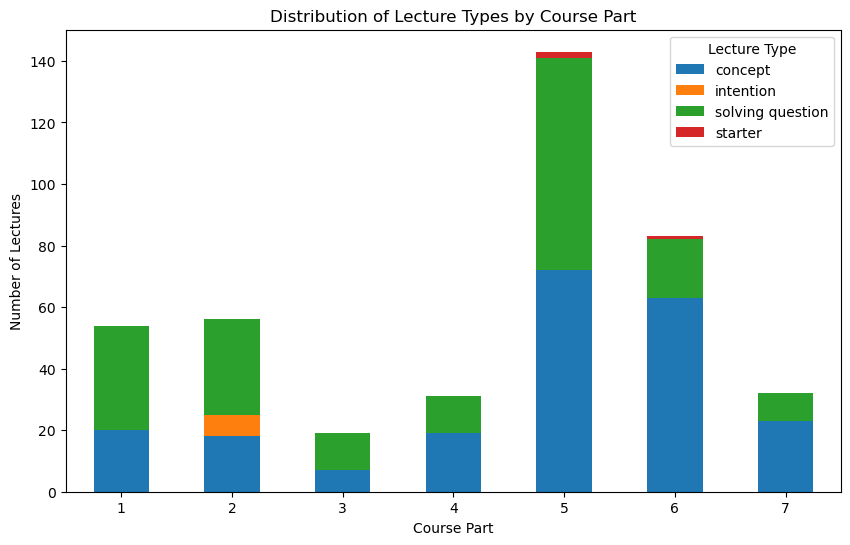

In [9]:
import matplotlib.pyplot as plt

# Распределение типов лекций по частям курса
lecture_type_distribution = lectures.groupby(['part', 'type_of']).size().unstack(fill_value=0)

# Построение графика
lecture_type_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Distribution of Lecture Types by Course Part")
plt.xlabel("Course Part")
plt.ylabel("Number of Lectures")
plt.xticks(rotation=0)
plt.legend(title="Lecture Type")
plt.show()